# Clustering Jerárchico (Hierarchical Clustering)
Katlyn Mackness <br>
08/01/2025 - Updated 03/03/2025

## Objetivo
Usaremos Clustering jerárquico para agrupar clientes basado en sus compras, y hacer recomendaciones de compras. La idea consiste en recomendar a un cliente los productos que ha comprado otra persona que pertenece al mismo clúster o segmento.

El objetivo de esta actividad es que realices un análisis de agrupación por “Clustering Jerárquico” a una base de datos de manera que puedas generar conclusiones de acuerdo a diversas categorías.

## Los Datos
El archivo “Amazon.xlsx” contiene los promedios de evaluación de 100 personas que adquirieron los mismos productos o muy similares en la tienda AMAZON.

In [1]:
# Importar bibliotécas
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt

# Cargar datos
data = pd.read_excel("Data/Amazon.xlsx")
data.set_index("Unnamed: 0", inplace=True)
data.head()

,Velocidad Entrega,Precio,Durabilidad,Imagen Producto,Valor Educativo,Servicio Retorno,Tamano Paquete,Calidad Producto,Numero Estrellas
Unnamed: 0,,,,,,,,,
Adam,205,3,345,235,24,23,26,21,17
Anna,9,15,315,33,25,4,42,215,28
Bernard,17,26,285,3,43,27,41,26,33
Edward,135,5,355,295,18,23,39,195,17
Emilia,3,45,48,39,34,46,225,34,43


## Analísis

In [2]:
# Normalizar datos 
from sklearn.preprocessing import normalize
data_scaled = normalize(data)
data_scaled

array([[0.43826336, 0.00641361, 0.73756517, 0.50239946, 0.05130888,
        0.04917101, 0.05558462, 0.04489527, 0.03634379],
       [0.02323527, 0.03872544, 0.81323434, 0.08519598, 0.06454241,
        0.01032679, 0.10843125, 0.55506471, 0.0722875 ],
       [0.05723452, 0.08753514, 0.95951982, 0.01010021, 0.14476966,
        0.09090188, 0.13803618, 0.08753514, 0.11110229],
       [0.25885639, 0.00958727, 0.68069644, 0.56564916, 0.03451419,
        0.04410146, 0.07478074, 0.37390368, 0.03259673],
       [0.01197502, 0.17962533, 0.19160036, 0.15567529, 0.13571692,
        0.18361701, 0.89812667, 0.13571692, 0.17164198],
       [0.14494006, 0.251738  , 0.60264551, 0.03661644, 0.03966781,
        0.02898801, 0.73995715, 0.03356507, 0.00457705],
       [0.04755854, 0.02481315, 0.98218723, 0.06823617, 0.07237169,
        0.09304932, 0.07857498, 0.05996511, 0.06410064],
       [0.13323393, 0.04304481, 0.06354234, 0.52268696, 0.05739308,
        0.04509456, 0.70716471, 0.44069685, 0.05944283],


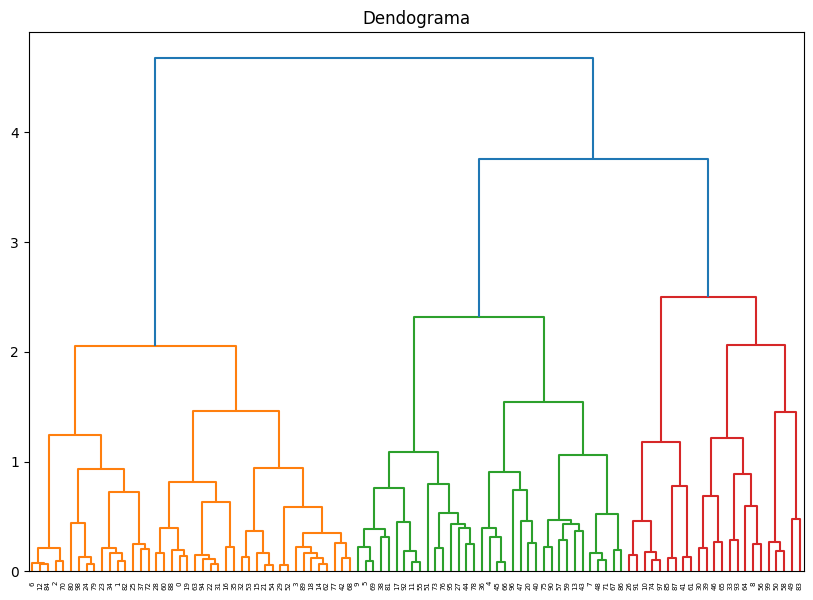

In [3]:
# Generar dendogram
import scipy.cluster.hierarchy as shc
plt.figure(figsize=(10,7))
plt.title("Dendograma")
dend = shc.dendrogram(shc.linkage(data_scaled, method="ward"))

In [4]:
# Encontrar colores únicos para el número de clústers optimo
colores_unicos = set(dend['color_list'])
num_clusters_optimo = len(colores_unicos) - 1
num_clusters_optimo

3

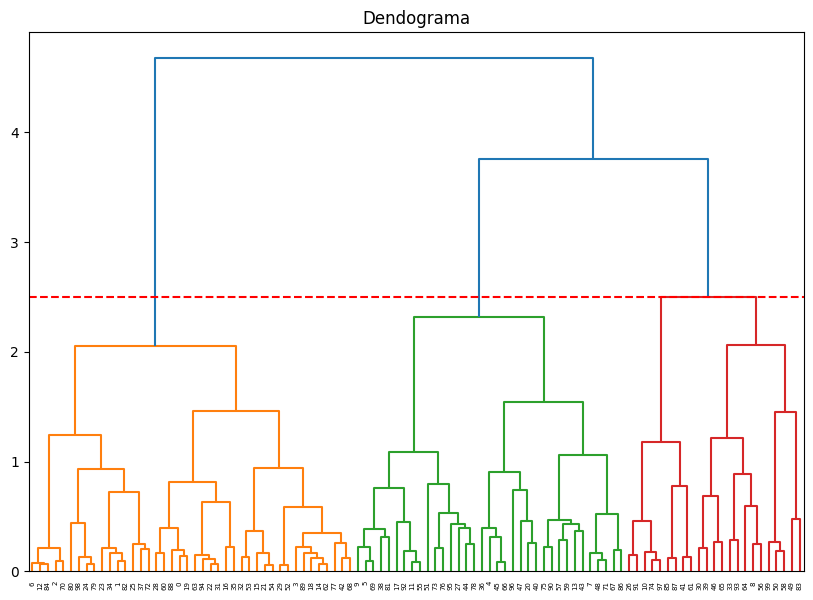

In [5]:
plt.figure(figsize=(10,7))
plt.title("Dendograma")
dend = shc.dendrogram(shc.linkage(data_scaled, method="ward"))
plt.axhline(y=2.5, color='r', linestyle = '--')

In [6]:
# Analisis gráfico con PCA
campos = data_scaled
from sklearn import decomposition
pca = decomposition.PCA(n_components = 2)
pca.fit(campos)
campos = pca.transform(campos)
campos

array([[ 0.39993219, -0.06035374],
       [ 0.40829583,  0.06402268],
       [ 0.49703182,  0.35955286],
       [ 0.33996675, -0.18434501],
       [-0.58207751,  0.38797653],
       [-0.1723403 ,  0.52962573],
       [ 0.56528441,  0.33770585],
       [-0.5335887 , -0.06994712],
       [-0.09981604, -0.47165743],
       [-0.22195207,  0.56503313],
       [-0.08274005, -0.39712712],
       [ 0.00143465,  0.48936583],
       [ 0.57292039,  0.35927774],
       [-0.51350639, -0.01301312],
       [ 0.35272162, -0.20639728],
       [ 0.4688626 , -0.0168001 ],
       [ 0.25142488, -0.04599019],
       [ 0.05456876,  0.22302796],
       [ 0.36123131, -0.20553368],
       [ 0.41087067, -0.02173183],
       [-0.54207892,  0.03308916],
       [ 0.5138909 ,  0.0900875 ],
       [ 0.4284552 ,  0.0601418 ],
       [ 0.42320562,  0.09945498],
       [ 0.42610215, -0.06318626],
       [ 0.10615885,  0.20376697],
       [-0.19058214, -0.3966612 ],
       [ 0.096838  ,  0.33104612],
       [ 0.51505714,

In [9]:
# Agrupar clientes
from sklearn.cluster import AgglomerativeClustering
cluster = AgglomerativeClustering(n_clusters=3, metric='euclidean', linkage='ward')
grupos = cluster.fit_predict(data_scaled)
grupos

array([1, 1, 1, 1, 2, 2, 1, 2, 0, 2, 0, 2, 1, 2, 1, 1, 1, 2, 1, 1, 2, 1,
       1, 1, 1, 1, 0, 2, 1, 1, 0, 1, 1, 0, 1, 1, 2, 1, 2, 0, 2, 0, 1, 2,
       2, 2, 0, 2, 2, 0, 0, 2, 1, 1, 1, 2, 0, 2, 0, 2, 1, 0, 1, 1, 0, 0,
       2, 2, 1, 2, 1, 2, 1, 2, 0, 2, 2, 1, 2, 1, 1, 2, 1, 0, 1, 0, 2, 0,
       1, 1, 2, 0, 2, 0, 1, 2, 2, 0, 1, 0])

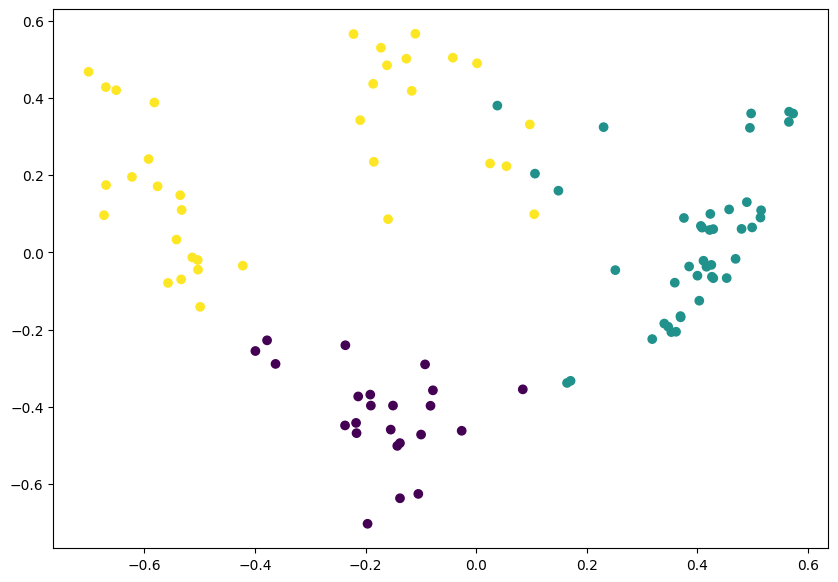

In [10]:
# Graficar las agrupaciones
plt.figure(figsize=(10,7))
plt.scatter(campos[:,0], campos[:,1], c = cluster.labels_)

In [11]:
# Convertir los grupos en un DataFrame
dataframe = pd.DataFrame(grupos, columns=['grupo'])
dataframe

,grupo
0,1
1,1
2,1
3,1
4,2
...,...
95,2
96,2
97,0
98,1


In [12]:
# Unir DataFrame principal con grupos
data_reset = data.reset_index()
dataframe2 = pd.concat([data_reset, dataframe], axis=1, join='inner')

# Establecer nombres como índice
dataframe2.set_index("Unnamed: 0", inplace=True)
dataframe2

,Velocidad Entrega,Precio,Durabilidad,Imagen Producto,Valor Educativo,Servicio Retorno,Tamano Paquete,Calidad Producto,Numero Estrellas,grupo
Unnamed: 0,,,,,,,,,,
Adam,205,3,345,235,24,23,26,21,17,1
Anna,9,15,315,33,25,4,42,215,28,1
Bernard,17,26,285,3,43,27,41,26,33,1
Edward,135,5,355,295,18,23,39,195,17,1
Emilia,3,45,48,39,34,46,225,34,43,2
...,...,...,...,...,...,...,...,...,...,...
Teofan,3,8,32,25,7,21,42,17,1,2
Teofil,305,25,46,24,33,28,355,26,45,2
Teofila,1,14,26,25,24,27,42,185,23,0


## Recomendaciones

In [13]:
# Usar funciones para dar recomendaciones para cade cliente
def find_group_by_name(cliente):
    """Encontrar valor de grupo segun el nombre """
    try: 
        grupo_valor = dataframe2.loc[cliente, 'grupo'] 
        return grupo_valor 
    except KeyError: 
        return f"'{cliente}' no encontrado."

def generate_list(grupo_num):
    """Generar una lista de nombres con el numero de grupo especificado"""
    filtered_df = dataframe2[dataframe2['grupo'] == grupo_num]
    return filtered_df.index.tolist()

def give_rec(cliente):
    """Dar una lista de clientes para recomendar productos similares"""
    grupo_valor = find_group_by_name(cliente)
    filtered_names_list = generate_list(grupo_valor)
    print(f"Recomendaría a {cliente} los mismos productos que compraron estos clientes:\n")
    print(filtered_names_list)

In [14]:
# Ejemplo: Con base en los resultados de su análisis, ¿qué productos recomendaría a Salomé? 
give_rec("Salome")

Recomendaría a Salome los mismos productos que compraron estos clientes:

['Emilia', 'Fabian', 'Frank', 'Gabriel', 'Henry', 'Isabelle', 'Eugenia', 'Evdokia', 'Florence', 'Jeremiah', 'Joachim', 'Santiago', 'Justin', 'Kalyna', 'Larissa', 'Leon', 'Leonard', 'Leo', 'Magdalyna', 'Marcel', 'Maria', 'Maryna', 'Matthew', 'Maya', 'Melania', 'Michael', 'Mina', 'Monica', 'Myron', 'Salome', 'Sebastian', 'Susanna', 'Sylvester', 'Teofan', 'Teofil']


In [15]:
# Ejemplo: ¿Qué productos recomendaría a Stephanía?
give_rec("Stephania")

Recomendaría a Stephania los mismos productos que compraron estos clientes:

['Adam', 'Anna', 'Bernard', 'Edward', 'Philip', 'Irene', 'Isidore', 'Joseph', 'Eugene', 'Eunice', 'Eva', 'Fedir', 'Felix', 'Fialka', 'Flavia', 'Flora', 'Hannah', 'Helen', 'Hilary', 'Lourdes', 'Ivan', 'Jacob', 'Jervis', 'Judith', 'Louise', 'Lubomyr', 'Lydia', 'Marian', 'Markian', 'Marko', 'Maura', 'Maximillian', 'Methodius', 'Mykyta', 'Myroslav', 'Myroslava', 'Samuel', 'Sarah', 'Stephan', 'Stephania', 'Theodore', 'Teon']


In [16]:
# Ejemplo: ¿Qué productos recomendaría a Lydia?
give_rec("Lydia")

Recomendaría a Lydia los mismos productos que compraron estos clientes:

['Adam', 'Anna', 'Bernard', 'Edward', 'Philip', 'Irene', 'Isidore', 'Joseph', 'Eugene', 'Eunice', 'Eva', 'Fedir', 'Felix', 'Fialka', 'Flavia', 'Flora', 'Hannah', 'Helen', 'Hilary', 'Lourdes', 'Ivan', 'Jacob', 'Jervis', 'Judith', 'Louise', 'Lubomyr', 'Lydia', 'Marian', 'Markian', 'Marko', 'Maura', 'Maximillian', 'Methodius', 'Mykyta', 'Myroslav', 'Myroslava', 'Samuel', 'Sarah', 'Stephan', 'Stephania', 'Theodore', 'Teon']
